In [63]:
!pip install pandas openpyxl
!pip install matplotlib

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')

In [65]:
df1 = pd.read_csv(filepath_or_buffer="./src/進出口貿易值.csv", encoding="utf-8")
df1
# 進出口貿易值(美元)

幣別  按美元計算/ 貿易總值  按美元計算/ 出口總值  按美元計算/ 進口總值  按美元計算/ 出(入)超
0        90年   236194.231   126608.592   109585.639     17022.953
1     90年 1月    19550.425    10064.663     9485.763       578.900
2     90年 2月    19659.423    10389.157     9270.266      1118.891
3     90年 3月    22213.690    12003.917    10209.773      1794.145
4     90年 4月    21872.949    11152.057    10720.892       431.165
..       ...          ...          ...          ...           ...
289  112年 3月    66149.446    35179.421    30970.025      4209.396
290  112年 4月    65160.313    35935.720    29224.593      6711.127
291  112年 5月    67340.282    36104.634    31235.648      4868.986
292  112年 6月    58671.201    32319.198    26352.003      5967.195
293  112年 7月    68982.924    38730.818    30252.106      8478.712

[294 rows x 5 columns]

In [66]:
df1 = df1.drop(range(0,len(df1),13))
df1

幣別  按美元計算/ 貿易總值  按美元計算/ 出口總值  按美元計算/ 進口總值  按美元計算/ 出(入)超
1     90年 1月    19550.425    10064.663     9485.763       578.900
2     90年 2月    19659.423    10389.157     9270.266      1118.891
3     90年 3月    22213.690    12003.917    10209.773      1794.145
4     90年 4月    21872.949    11152.057    10720.892       431.165
5     90年 5月    19538.677    10406.649     9132.028      1274.621
..       ...          ...          ...          ...           ...
289  112年 3月    66149.446    35179.421    30970.025      4209.396
290  112年 4月    65160.313    35935.720    29224.593      6711.127
291  112年 5月    67340.282    36104.634    31235.648      4868.986
292  112年 6月    58671.201    32319.198    26352.003      5967.195
293  112年 7月    68982.924    38730.818    30252.106      8478.712

[271 rows x 5 columns]

In [67]:
print(df1["幣別"][11])
print(df1["幣別"][12])
# print(df1["幣別"][13])
print(df1["幣別"][14])

90年 11月
90年 12月
91年 1月


In [68]:
df1[["年", "月"]] = df1["幣別"].str.split(' ', expand=True)
df1

幣別  按美元計算/ 貿易總值  按美元計算/ 出口總值  按美元計算/ 進口總值  按美元計算/ 出(入)超     年   月
1     90年 1月    19550.425    10064.663     9485.763       578.900   90年  1月
2     90年 2月    19659.423    10389.157     9270.266      1118.891   90年  2月
3     90年 3月    22213.690    12003.917    10209.773      1794.145   90年  3月
4     90年 4月    21872.949    11152.057    10720.892       431.165   90年  4月
5     90年 5月    19538.677    10406.649     9132.028      1274.621   90年  5月
..       ...          ...          ...          ...           ...   ...  ..
289  112年 3月    66149.446    35179.421    30970.025      4209.396  112年  3月
290  112年 4月    65160.313    35935.720    29224.593      6711.127  112年  4月
291  112年 5月    67340.282    36104.634    31235.648      4868.986  112年  5月
292  112年 6月    58671.201    32319.198    26352.003      5967.195  112年  6月
293  112年 7月    68982.924    38730.818    30252.106      8478.712  112年  7月

[271 rows x 7 columns]

In [69]:
df1["年"] = df1["年"].str.replace("年", "").astype(int)
df1["月"] = df1["月"].str.replace("月", "").astype(int)
df1["年月"] = (df1["年"]+1911).astype(str) + df1['月'].astype(str).str.zfill(2)
df1["年月"]

1      200101
2      200102
3      200103
4      200104
5      200105
        ...  
289    202303
290    202304
291    202305
292    202306
293    202307
Name: 年月, Length: 271, dtype: object

In [70]:
df1.rename(columns={"按美元計算/ 貿易總值":"貿易總值",
                   "按美元計算/ 出口總值":"出口總值",
                   "按美元計算/ 進口總值":"進口總值",
                   "按美元計算/ 出(入)超":"出入超"
                  }, inplace=True)
df1

幣別       貿易總值       出口總值       進口總值       出入超    年  月      年月
1     90年 1月  19550.425  10064.663   9485.763   578.900   90  1  200101
2     90年 2月  19659.423  10389.157   9270.266  1118.891   90  2  200102
3     90年 3月  22213.690  12003.917  10209.773  1794.145   90  3  200103
4     90年 4月  21872.949  11152.057  10720.892   431.165   90  4  200104
5     90年 5月  19538.677  10406.649   9132.028  1274.621   90  5  200105
..       ...        ...        ...        ...       ...  ... ..     ...
289  112年 3月  66149.446  35179.421  30970.025  4209.396  112  3  202303
290  112年 4月  65160.313  35935.720  29224.593  6711.127  112  4  202304
291  112年 5月  67340.282  36104.634  31235.648  4868.986  112  5  202305
292  112年 6月  58671.201  32319.198  26352.003  5967.195  112  6  202306
293  112年 7月  68982.924  38730.818  30252.106  8478.712  112  7  202307

[271 rows x 8 columns]

In [71]:
df1 = df1.drop(["幣別", "年", "月"],axis=1)
df1

貿易總值       出口總值       進口總值       出入超      年月
1    19550.425  10064.663   9485.763   578.900  200101
2    19659.423  10389.157   9270.266  1118.891  200102
3    22213.690  12003.917  10209.773  1794.145  200103
4    21872.949  11152.057  10720.892   431.165  200104
5    19538.677  10406.649   9132.028  1274.621  200105
..         ...        ...        ...       ...     ...
289  66149.446  35179.421  30970.025  4209.396  202303
290  65160.313  35935.720  29224.593  6711.127  202304
291  67340.282  36104.634  31235.648  4868.986  202305
292  58671.201  32319.198  26352.003  5967.195  202306
293  68982.924  38730.818  30252.106  8478.712  202307

[271 rows x 5 columns]

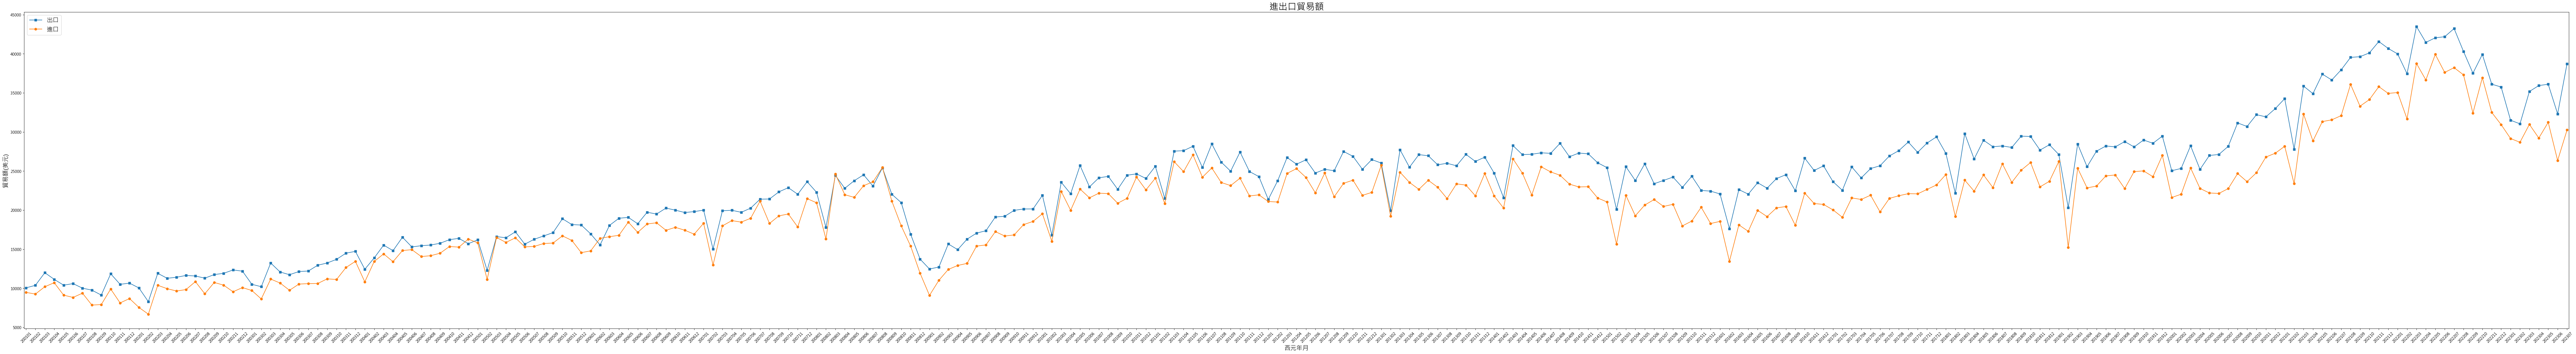

In [72]:
plt.figure(figsize=(120, 15))
#調整輸出圖片的大小

plot1 = plt.plot(df1["年月"],df1["出口總值"],"-s",label="出口")
plot2 = plt.plot(df1["年月"],df1["進口總值"],"-o",label="進口")

plt.xticks(rotation=45)
#X軸座標刻度旋轉45度

plt.ticklabel_format(style='plain', axis='y')
#Y軸不顯示科學記號

plt.xlim(xmin=-0.2,xmax=270.2)
#調整X軸第一筆資料與最後一筆資料到邊界的距離

plt.title("進出口貿易額", fontsize=24)
plt.xlabel("西元年月", fontsize=16)
plt.ylabel("貿易額(美元)", fontsize=16)
plt.legend(loc=2,prop={'size':16})

plt.show()

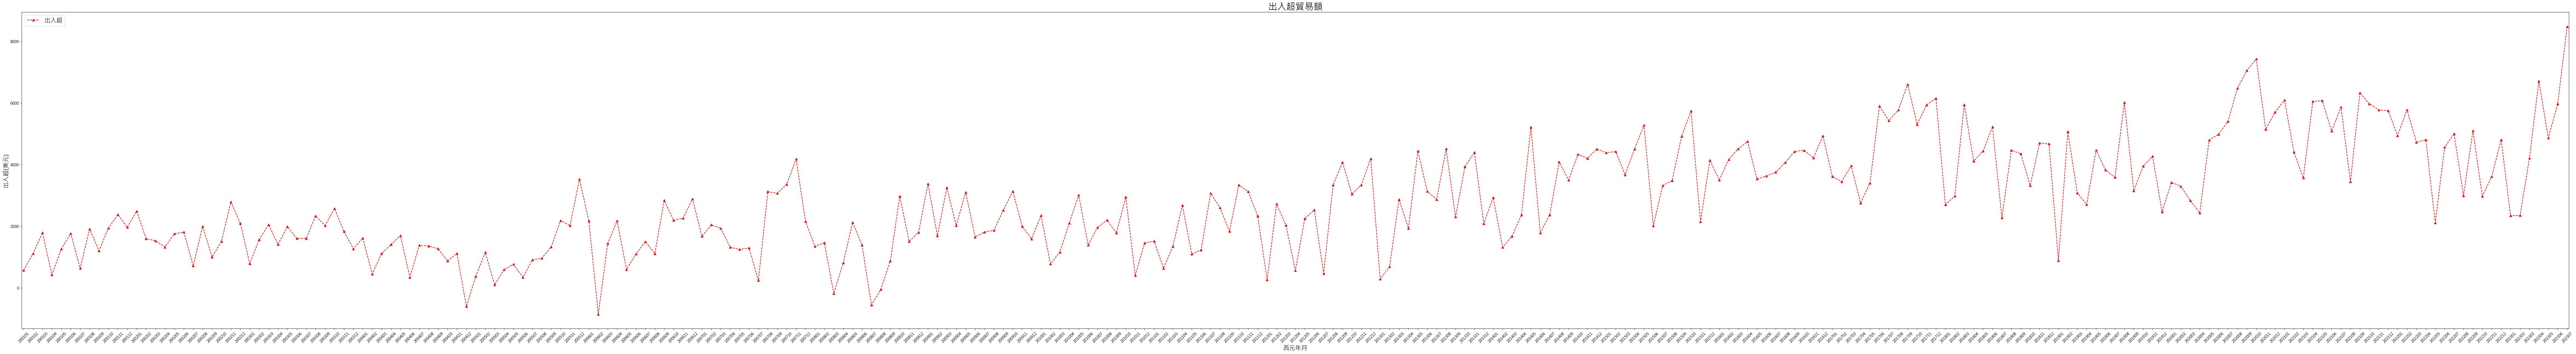

In [73]:
plt.figure(figsize=(120, 15))

plot3= plt.plot(df1["年月"],df1["出入超"],"--^",color="r",label="出入超")

plt.xticks(rotation=45)

plt.ticklabel_format(style='plain', axis='y')

plt.xlim(xmin=-0.2,xmax=270.2)

plt.title("出入超貿易額", fontsize=24)
plt.xlabel("西元年月", fontsize=16)
plt.ylabel("出入超(美元)", fontsize=16)
plt.legend(loc=2,prop={"size":16})

plt.show()

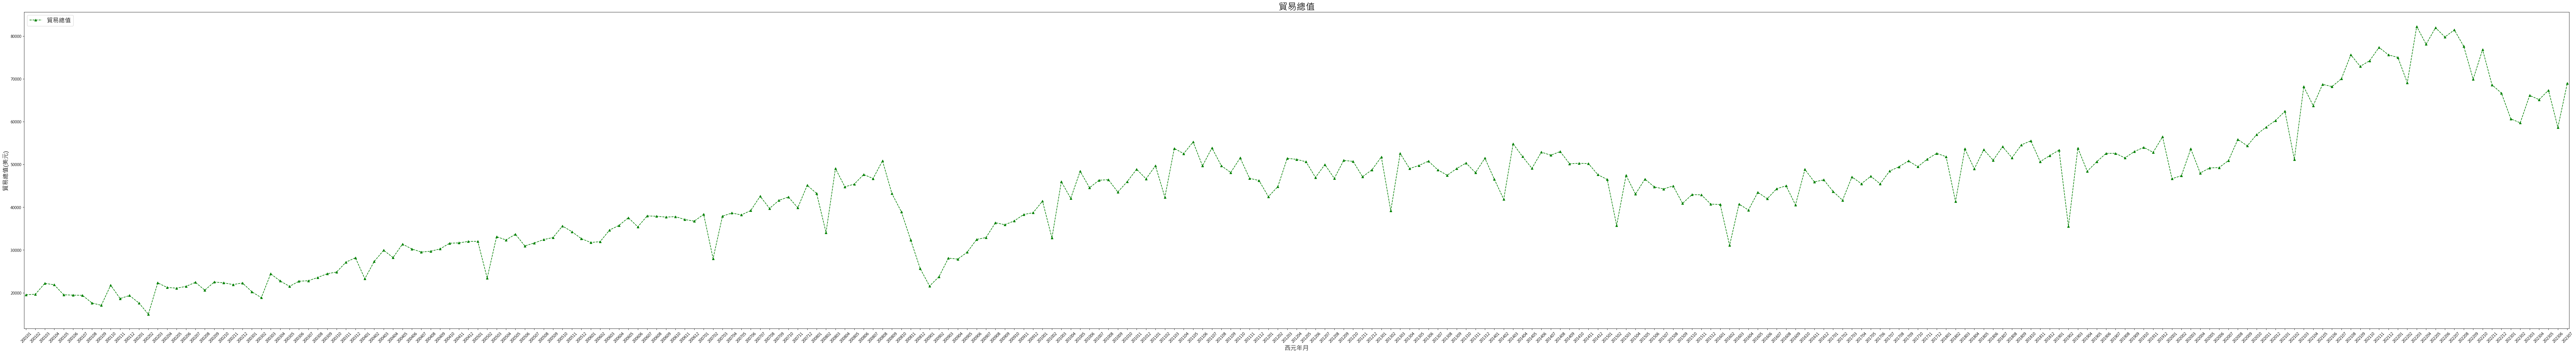

In [74]:
plt.figure(figsize=(120, 15))

plot3= plt.plot(df1["年月"],df1["貿易總值"],"--^",color="g",label="貿易總值")

plt.xticks(rotation=45)

plt.ticklabel_format(style='plain', axis='y')

plt.xlim(xmin=-0.2,xmax=270.2)

plt.title("貿易總值", fontsize=24)
plt.xlabel("西元年月", fontsize=16)
plt.ylabel("貿易總值(美元)", fontsize=16)
plt.legend(loc=2,prop={"size":16})

plt.show()

In [75]:
df2 = pd.read_csv(filepath_or_buffer="./src/臺灣地區國際商港貨櫃裝卸量 (2).csv", encoding="BIG5")
df2
# 臺灣地區國際商港貨櫃裝卸量 (teu)

年月   港口別          總計          進港          出港        進口實櫃       進口空櫃  \
0     200101  國際商港   757557.75   380881.75      376676   134388.25    77345.5   
1     200101   基隆港    128067.5       71625     56442.5     47244.5    20042.5   
2     200101   臺中港     73364.5       37248     36116.5       13637      13981   
3     200101   高雄港   556125.75   272008.75      284117    73506.75      43322   
4     200101   花蓮港           0           0           0           0          0   
...      ...   ...         ...         ...         ...         ...        ...   
2163  202307   高雄港  689,961.00  347,338.75  342,622.25  137,608.75  45,203.25   
2164  202307   花蓮港           0           0           0           0          0   
2165  202307   臺北港  136,096.00   67,354.25   68,741.75   42,028.75   8,375.75   
2166  202307   蘇澳港           0           0           0           0          0   
2167  202307   安平港          80          40          40           0          0   

            出口實櫃       出口空櫃        轉口實櫃   轉口空櫃    國內貨櫃實櫃    國內貨櫃空櫃  
0       193133.5   10477.75   294162.75  48050         0         0  
1       49391.25       2445     8798.25    146         0         0  
2        24404.5        130       19285   1927         0         0  
3      119337.75    7902.75    266079.5  45977         0         0  
4              0          0           0      0         0         0  
...          ...        ...         ...    ...       ...       ...  
2163  151,629.25  37,778.00  312,106.75    439  3,360.00  1,836.00  
2164           0          0           0      0         0         0  
2165   38,084.50  14,608.00   32,168.00      0       831         0  
2166           0          0           0      0         0         0  
2167           0          0          80      0         0         0  

[2168 rows x 13 columns]

In [76]:
df2 = df2[df2['港口別'] == "國際商港"]
df2

年月   港口別            總計          進港          出港        進口實櫃  \
0     200101  國際商港     757557.75   380881.75      376676   134388.25   
8     200102  國際商港     775479.25      384994   390485.25    134277.5   
16    200103  國際商港     929237.25      455451   473786.25   171649.25   
24    200104  國際商港     874790.75   431107.75      443683    164032.5   
32    200105  國際商港     901189.75   450308.25    450881.5   160927.25   
...      ...   ...           ...         ...         ...         ...   
2128  202303  國際商港    1201004.75    616102.5   584902.25   323923.25   
2136  202304  國際商港  1,127,711.25  576,540.75  551,170.50  310,818.75   
2144  202305  國際商港  1,210,399.50  604,546.75  605,852.75  319,051.75   
2152  202306  國際商港  1,112,139.50  551,328.00  560,811.50  297,394.25   
2160  202307  國際商港  1,090,844.00  544,104.00  546,740.00  290,341.75   

           進口空櫃        出口實櫃       出口空櫃        轉口實櫃      轉口空櫃    國內貨櫃實櫃  \
0       77345.5    193133.5   10477.75   294162.75     48050         0   
8       83353.5   214877.75   15798.75      271063  56108.75         0   
16      83013.5    260969.5   19572.25   335764.75     58268         0   
24     80926.75      237600      19649      315294   57288.5         0   
32     92001.75   244902.25   22600.75      324274  56483.75         0   
...         ...         ...        ...         ...       ...       ...   
2128   89714.25      300496   84561.75    392139.5       333      6304   
2136  78,288.75  285,275.25  81,302.25  362,958.25       872  5,276.00   
2144  81,731.25  310,892.50  89,889.00  399,254.00       463  6,110.00   
2152  67,233.75  279,174.50  86,030.75  373,820.25       170  5,523.00   
2160  68,486.75  282,164.50  91,114.25  350,324.75       493  5,484.00   

        國內貨櫃空櫃  
0            0  
8            0  
16           0  
24           0  
32           0  
...        ...  
2128      3533  
2136  2,920.00  
2144  3,008.00  
2152  2,793.00  
2160  2,435.00  

[271 rows x 13 columns]

In [77]:
df2.loc[:, "年月"] = df2["年月"].astype(str)
df2

年月   港口別            總計          進港          出港        進口實櫃  \
0     200101  國際商港     757557.75   380881.75      376676   134388.25   
8     200102  國際商港     775479.25      384994   390485.25    134277.5   
16    200103  國際商港     929237.25      455451   473786.25   171649.25   
24    200104  國際商港     874790.75   431107.75      443683    164032.5   
32    200105  國際商港     901189.75   450308.25    450881.5   160927.25   
...      ...   ...           ...         ...         ...         ...   
2128  202303  國際商港    1201004.75    616102.5   584902.25   323923.25   
2136  202304  國際商港  1,127,711.25  576,540.75  551,170.50  310,818.75   
2144  202305  國際商港  1,210,399.50  604,546.75  605,852.75  319,051.75   
2152  202306  國際商港  1,112,139.50  551,328.00  560,811.50  297,394.25   
2160  202307  國際商港  1,090,844.00  544,104.00  546,740.00  290,341.75   

           進口空櫃        出口實櫃       出口空櫃        轉口實櫃      轉口空櫃    國內貨櫃實櫃  \
0       77345.5    193133.5   10477.75   294162.75     48050         0   
8       83353.5   214877.75   15798.75      271063  56108.75         0   
16      83013.5    260969.5   19572.25   335764.75     58268         0   
24     80926.75      237600      19649      315294   57288.5         0   
32     92001.75   244902.25   22600.75      324274  56483.75         0   
...         ...         ...        ...         ...       ...       ...   
2128   89714.25      300496   84561.75    392139.5       333      6304   
2136  78,288.75  285,275.25  81,302.25  362,958.25       872  5,276.00   
2144  81,731.25  310,892.50  89,889.00  399,254.00       463  6,110.00   
2152  67,233.75  279,174.50  86,030.75  373,820.25       170  5,523.00   
2160  68,486.75  282,164.50  91,114.25  350,324.75       493  5,484.00   

        國內貨櫃空櫃  
0            0  
8            0  
16           0  
24           0  
32           0  
...        ...  
2128      3533  
2136  2,920.00  
2144  3,008.00  
2152  2,793.00  
2160  2,435.00  

[271 rows x 13 columns]

In [78]:
df2.loc[:, "出港"] = df2["出港"].str.replace(",", "").astype(float)
df2.loc[:, "進港"] = df2["進港"].str.replace(",", "").astype(float)
df2.loc[:, "總計"] = df2["總計"].str.replace(",", "").astype(float)
df2

年月   港口別          總計         進港         出港        進口實櫃       進口空櫃  \
0     200101  國際商港   757557.75  380881.75   376676.0   134388.25    77345.5   
8     200102  國際商港   775479.25   384994.0  390485.25    134277.5    83353.5   
16    200103  國際商港   929237.25   455451.0  473786.25   171649.25    83013.5   
24    200104  國際商港   874790.75  431107.75   443683.0    164032.5   80926.75   
32    200105  國際商港   901189.75  450308.25   450881.5   160927.25   92001.75   
...      ...   ...         ...        ...        ...         ...        ...   
2128  202303  國際商港  1201004.75   616102.5  584902.25   323923.25   89714.25   
2136  202304  國際商港  1127711.25  576540.75   551170.5  310,818.75  78,288.75   
2144  202305  國際商港   1210399.5  604546.75  605852.75  319,051.75  81,731.25   
2152  202306  國際商港   1112139.5   551328.0   560811.5  297,394.25  67,233.75   
2160  202307  國際商港   1090844.0   544104.0   546740.0  290,341.75  68,486.75   

            出口實櫃       出口空櫃        轉口實櫃      轉口空櫃    國內貨櫃實櫃    國內貨櫃空櫃  
0       193133.5   10477.75   294162.75     48050         0         0  
8      214877.75   15798.75      271063  56108.75         0         0  
16      260969.5   19572.25   335764.75     58268         0         0  
24        237600      19649      315294   57288.5         0         0  
32     244902.25   22600.75      324274  56483.75         0         0  
...          ...        ...         ...       ...       ...       ...  
2128      300496   84561.75    392139.5       333      6304      3533  
2136  285,275.25  81,302.25  362,958.25       872  5,276.00  2,920.00  
2144  310,892.50  89,889.00  399,254.00       463  6,110.00  3,008.00  
2152  279,174.50  86,030.75  373,820.25       170  5,523.00  2,793.00  
2160  282,164.50  91,114.25  350,324.75       493  5,484.00  2,435.00  

[271 rows x 13 columns]

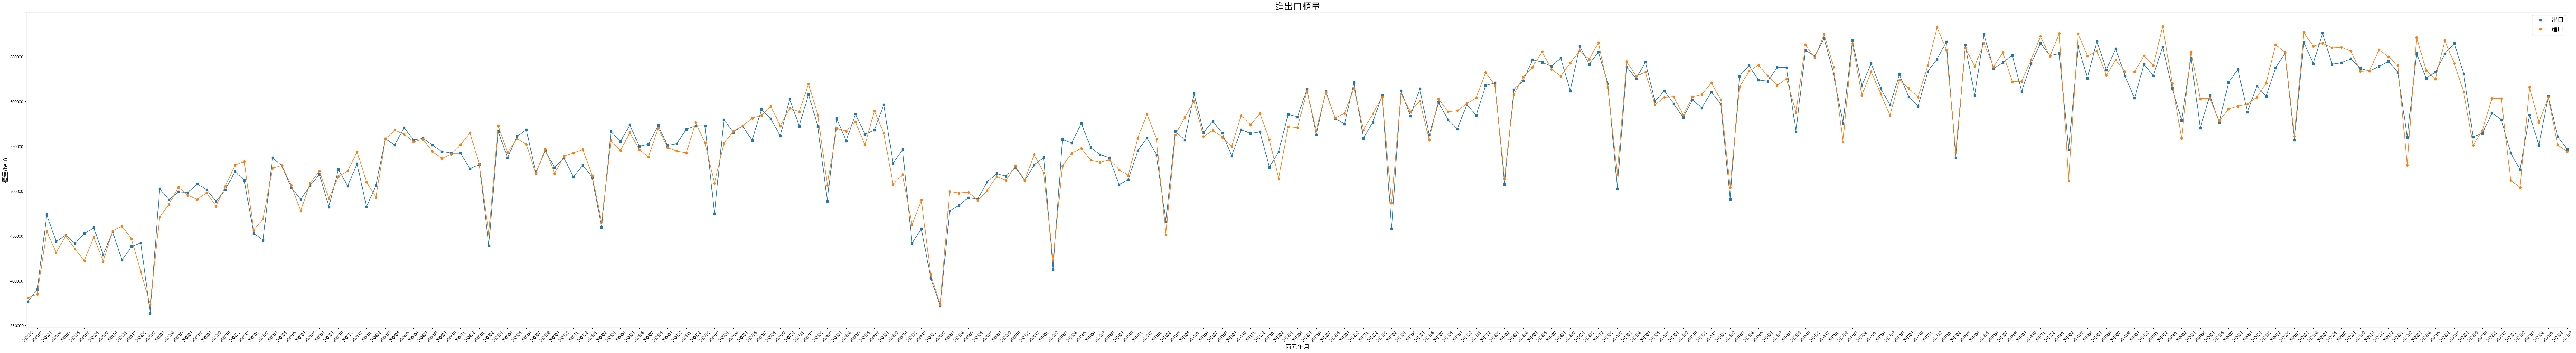

In [79]:
plt.figure(figsize=(120, 15))

plt.plot(df2["年月"],df2["出港"],"-s",label="出口")
plt.plot(df2["年月"],df2["進港"],"-o",label="進口")

plt.xticks(rotation=45)
# plt.yticks(rotation=45)
# plt.ticklabel_format(style='plain', axis='y')

plt.xlim(xmin=-0.2,xmax=270.2)

plt.title("進出口櫃量", fontsize=24)
plt.xlabel("西元年月", fontsize=16)
plt.ylabel("櫃量(teu)", fontsize=16)
plt.legend(loc=1,prop={'size':16})

plt.show()

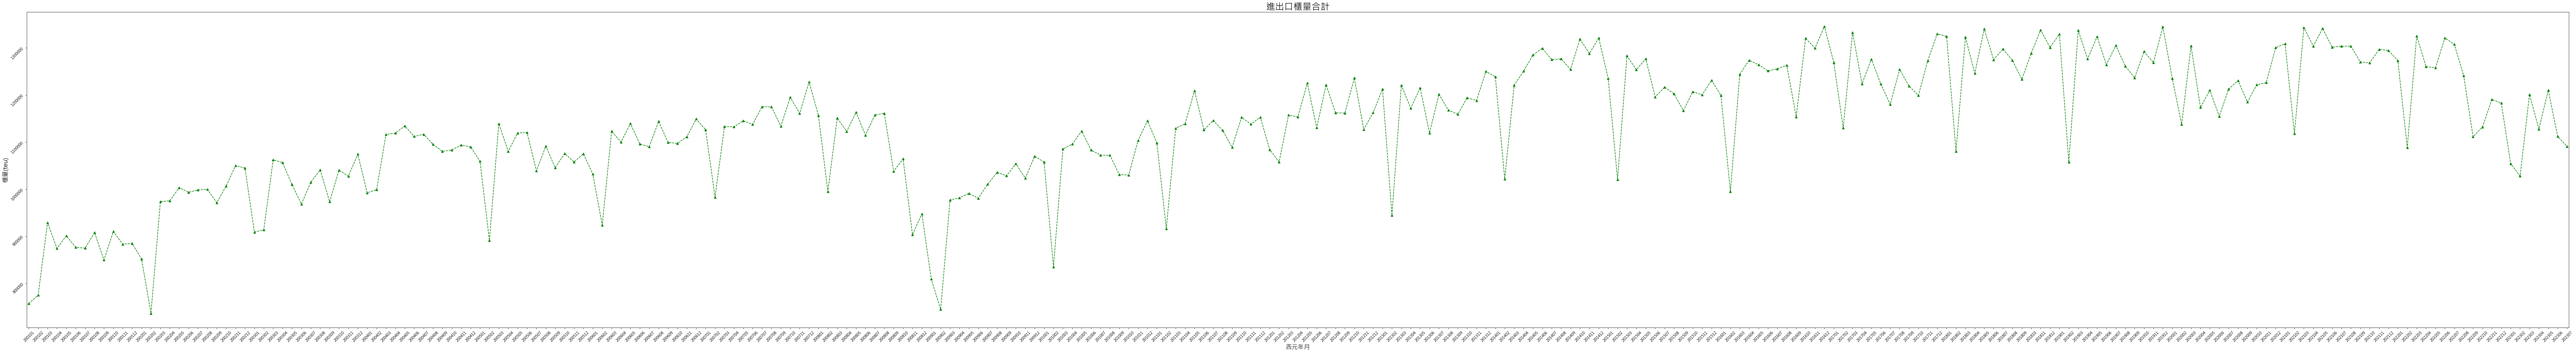

In [80]:
plt.figure(figsize=(120, 15))

plt.plot(df2["年月"],df2["總計"],"--^",color="g")

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

plt.xlim(xmin=-0.2,xmax=270.2)

plt.title("進出口櫃量合計", fontsize=24)
plt.xlabel("西元年月", fontsize=16)
plt.ylabel("櫃量(teu)", fontsize=16)

plt.show()

In [81]:
def cosine_similarity(vector1,vector2):
    dot_product = np.dot(vector1, vector2)
    #內積
    
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    #向量長度(平方合開根號)
    
    return dot_product / (norm_vector1 * norm_vector2)
    #餘弦相似度

In [82]:
container = df2["總計"].to_numpy()
expImp = (df1["出入超"]).to_numpy()
cosine_similarity(container,expImp)
# 櫃量 與 出入超 的 餘弦相似度

0.8838919372821239

In [105]:
ttv = (df1["貿易總值"]).to_numpy()
cosine_similarity(container,ttv)
# 櫃量 與 貿易總值 的 餘弦相似度

0.9703851174386563

In [83]:
# test = np.inner(container, expImp)
# print(test/((np.sum(container**2)**0.5)*(np.sum(expImp**2)**0.5)))
# print(np.inner(container, expImp) / (np.sqrt(np.inner(container, container))*np.sqrt(np.inner(expImp, expImp))))

0.8838919372821239
0.8838919372821239


In [104]:
# test = np.inner(container, ttv)
# print(test/((np.sum(container**2)**0.5)*(np.sum(ttv**2)**0.5)))
# print(np.inner(container, ttv) / (np.sqrt(np.inner(container, container))*np.sqrt(np.inner(ttv, ttv))))

0.9703851174386562
0.9703851174386563


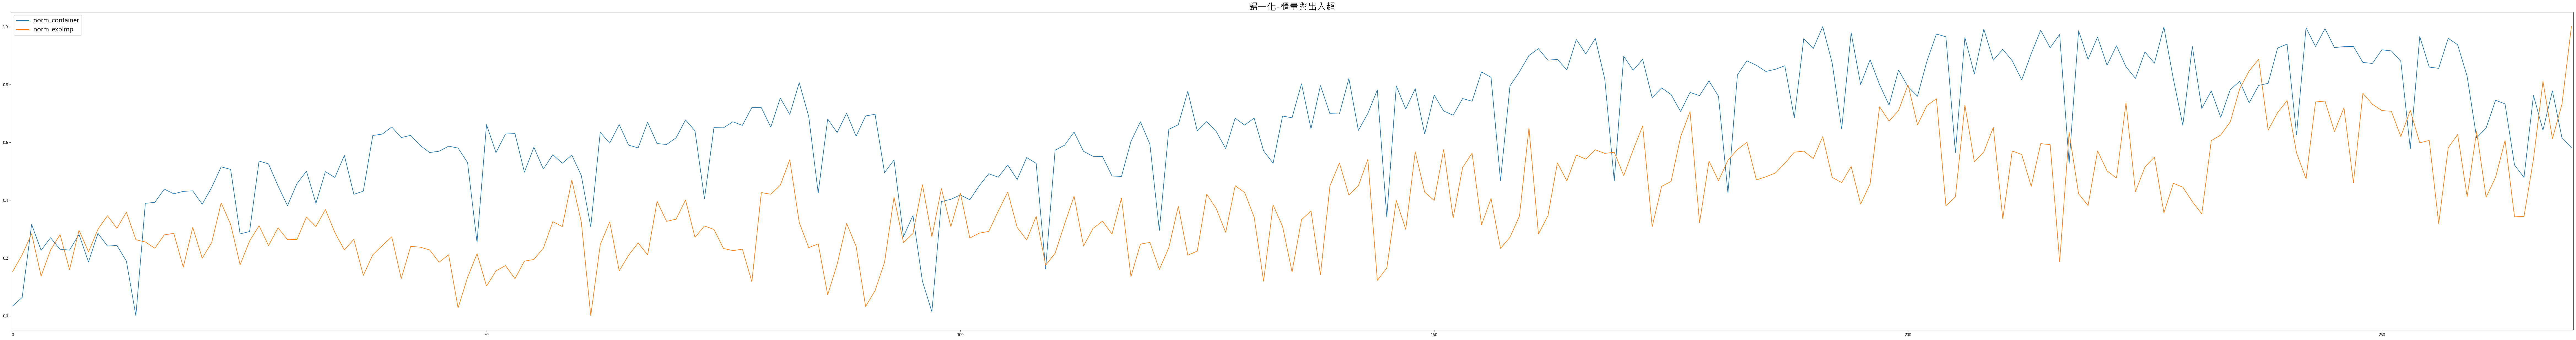

In [106]:
plt.figure(figsize=(120, 15))

min_val = np.min(container)
max_val = np.max(container)
norm_container = (container - min_val) / (max_val - min_val)

min_val = np.min(expImp)
max_val = np.max(expImp)
norm_expImp = (expImp - min_val) / (max_val - min_val)

plt.plot(norm_container, label='norm_container')
plt.plot(norm_expImp, label='norm_expImp')

plt.xlim(xmin=-0.2,xmax=270.2)
# plt.xticks(np.arange(0,len(container)))

plt.title("歸一化-櫃量與出入超", fontsize=24)
plt.legend(loc=2, prop={'size':16})
plt.show()
# 櫃量 與 出入超 的 歸一化

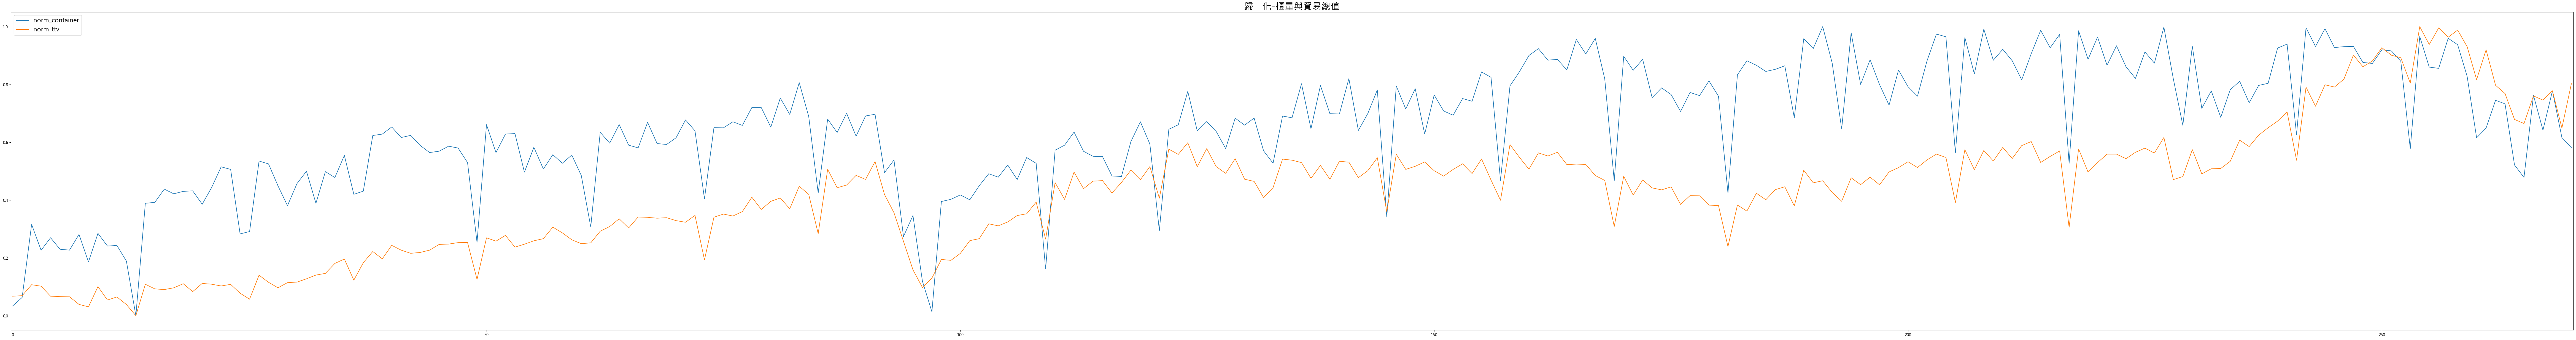

In [107]:
plt.figure(figsize=(120, 15))

min_val = np.min(container)
max_val = np.max(container)
norm_container = (container - min_val) / (max_val - min_val)

min_val = np.min(ttv)
max_val = np.max(ttv)
norm_ttv = (ttv - min_val) / (max_val - min_val)

plt.plot(norm_container, label='norm_container')
plt.plot(norm_ttv, label='norm_ttv')

plt.xlim(xmin=-0.2,xmax=270.2)
# plt.xticks(np.arange(0,len(container)))

plt.title("歸一化-櫃量與貿易總值", fontsize=24)
plt.legend(loc=2, prop={'size':16})
plt.show()
# 櫃量 與 貿易總值 的 歸一化

In [113]:
container = container.astype(float)
ttv = ttv.astype(float)
expImp = expImp.astype(float)
correlation1 = np.corrcoef(container, ttv)[0, 1]
print("櫃量與貿易總值-相關係數:",correlation1)

correlation2 = np.corrcoef(container, expImp)[0, 1]
print("櫃量與出入超-相關係數:",correlation2)

correlation3 = np.corrcoef(ttv, expImp)[0, 1]
print("貿易總值與出入超-相關係數:",correlation3)
#相關係數

櫃量與貿易總值-相關係數: 0.7497612704977306
櫃量與出入超-相關係數: 0.5525376850016065
貿易總值與出入超-相關係數: 0.5768008708324375


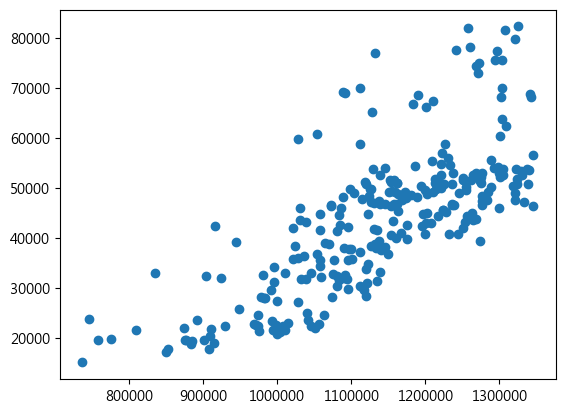

In [89]:
plt.scatter(container, ttv)
plt.ticklabel_format(style='plain', axis='both')
plt.show()

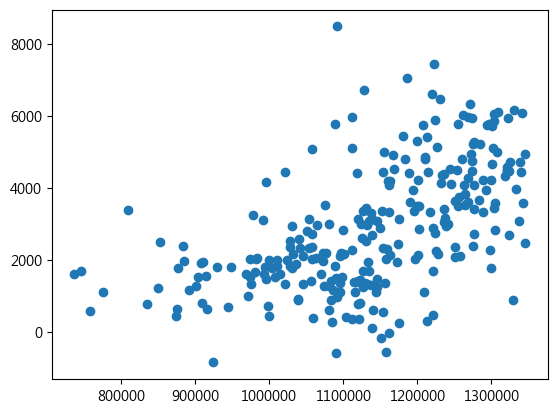

In [110]:
plt.scatter(container, expImp)
plt.ticklabel_format(style='plain', axis='both')
plt.show()

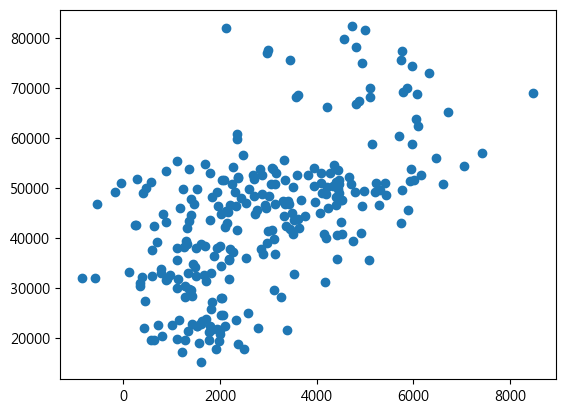

In [108]:
plt.scatter(expImp, ttv)
plt.ticklabel_format(style='plain', axis='both')
plt.show()

In [90]:
df3 = pd.read_csv(filepath_or_buffer="./src/2603.TW (1).csv", encoding="utf-8")
df3

Date        Open        High         Low       Close   Adj Close  \
0    2001-01-01   26.574484   30.796600   26.574484   28.809732    8.018488   
1    2001-02-01   28.809732   30.672428   27.567934   27.692108    7.707423   
2    2001-03-01   27.319572   27.692108   24.215063   24.463425    6.808798   
3    2001-04-01   24.463425   24.711788   19.868773   20.117134    5.599114   
4    2001-05-01   20.117134   21.483107   18.751163   20.241308    5.633675   
..          ...         ...         ...         ...         ...         ...   
267  2023-04-01  158.500000  175.500000  158.000000  161.500000   88.564522   
268  2023-05-01  160.000000  160.500000  148.000000  153.000000   83.903229   
269  2023-06-01  154.500000  166.500000   89.500000   93.500000   51.274197   
270  2023-07-01   98.800003  112.000000   95.500000  104.000000  104.000000   
271  2023-08-01  104.500000  110.500000  102.500000  105.500000  105.500000   

        Volume  
0     67576620  
1     77177869  
2     42340253  
3     47576405  
4     36550856  
..         ...  
267  373903791  
268  436293710  
269  848586478  
270  982675204  
271  378633060  

[272 rows x 7 columns]

In [91]:
df3 = df3.drop(len(df3)-1)
df3

Date        Open        High         Low       Close   Adj Close  \
0    2001-01-01   26.574484   30.796600   26.574484   28.809732    8.018488   
1    2001-02-01   28.809732   30.672428   27.567934   27.692108    7.707423   
2    2001-03-01   27.319572   27.692108   24.215063   24.463425    6.808798   
3    2001-04-01   24.463425   24.711788   19.868773   20.117134    5.599114   
4    2001-05-01   20.117134   21.483107   18.751163   20.241308    5.633675   
..          ...         ...         ...         ...         ...         ...   
266  2023-03-01  157.500000  179.500000  154.000000  158.500000   86.919357   
267  2023-04-01  158.500000  175.500000  158.000000  161.500000   88.564522   
268  2023-05-01  160.000000  160.500000  148.000000  153.000000   83.903229   
269  2023-06-01  154.500000  166.500000   89.500000   93.500000   51.274197   
270  2023-07-01   98.800003  112.000000   95.500000  104.000000  104.000000   

        Volume  
0     67576620  
1     77177869  
2     42340253  
3     47576405  
4     36550856  
..         ...  
266  837355711  
267  373903791  
268  436293710  
269  848586478  
270  982675204  

[271 rows x 7 columns]

In [92]:
emc = df3["Close"].to_numpy()
emc

array([ 28.809732,  27.692108,  24.463425,  20.117134,  20.241308,
        19.123699,  14.529047,  21.358932,  12.919678,  12.790481,
        15.761998,  16.278788,  17.893744,  22.867823,  21.317457,
        21.317457,  22.997021,  21.059065,  21.930374,  18.709337,
        14.323277,  19.600271,  20.148525,  29.605989,  34.403267,
        32.34729 ,  33.443813,  29.194807,  35.773918,  33.717941,
        33.032616,  33.511513,  38.217388,  42.495464,  39.358215,
        42.210251,  49.340363,  51.9072  ,  47.486542,  36.363564,
        37.504391,  40.499023,  35.650551,  44.064091,  50.335732,
        43.533604,  45.952141,  48.521835,  45.952141,  48.521835,
        46.707935,  45.196346,  42.551079,  42.626656,  39.754654,
        41.061413,  41.978661,  40.510876,  41.685104,  46.577721,
        37.586285,  38.592243,  39.728058,  43.544296,  40.238358,
        44.229263,  43.446445,  38.216236,  39.47266 ,  39.996174,
        39.996174,  39.47266 ,  38.320938,  45.02187 ,  44.184

In [93]:
print("櫃量與長榮股價:",
      cosine_similarity(container,emc))
print("出入超與長榮股價:",
      cosine_similarity(expImp,emc))
print("貿易總值與長榮股價:",
      cosine_similarity(ttv,emc))

櫃量與長榮股價: 0.6668840471494863
出入超與長榮股價: 0.6924668839210458
貿易總值與長榮股價: 0.7705515501346006


In [94]:
df4 = pd.read_csv(filepath_or_buffer="./src/^TWII (1).csv", encoding="utf-8")
df4

Date          Open          High           Low         Close  \
0    2001-01-01   4717.490234   5992.430176   4678.000000   5936.200195   
1    2001-02-01   5927.250000   6198.220215   5653.859863   5674.689941   
2    2001-03-01   5581.950195   5981.310059   5471.620117   5797.919922   
3    2001-04-01   5797.850098   5797.850098   5345.600098   5381.669922   
4    2001-05-01   5469.950195   5502.529785   4902.220215   5048.859863   
..          ...           ...           ...           ...           ...   
267  2023-04-01  15838.070313  15973.820313  15284.459961  15579.179688   
268  2023-05-01  15588.679688  16683.759766  15424.419922  16578.960938   
269  2023-06-01  16511.000000  17346.320313  16477.429688  16915.539063   
270  2023-07-01  16915.539063  17463.759766  16593.839844  17145.429688   
271  2023-08-01  17141.970703  17252.320313  16264.650391  16719.820313   

        Adj Close    Volume  
0     5936.178223         0  
1     5674.668945         0  
2     5797.898926         0  
3     5381.649902         0  
4     5048.840820         0  
..            ...       ...  
267  15579.179688  51398900  
268  16578.960938  68595500  
269  16915.539063  82322300  
270  17145.429688  90902100  
271  16719.820313  72316500  

[272 rows x 7 columns]

In [95]:
df4 = df4.drop(len(df4)-1)
df4

Date          Open          High           Low         Close  \
0    2001-01-01   4717.490234   5992.430176   4678.000000   5936.200195   
1    2001-02-01   5927.250000   6198.220215   5653.859863   5674.689941   
2    2001-03-01   5581.950195   5981.310059   5471.620117   5797.919922   
3    2001-04-01   5797.850098   5797.850098   5345.600098   5381.669922   
4    2001-05-01   5469.950195   5502.529785   4902.220215   5048.859863   
..          ...           ...           ...           ...           ...   
266  2023-03-01  15435.379883  15951.799805  15186.740234  15868.059570   
267  2023-04-01  15838.070313  15973.820313  15284.459961  15579.179688   
268  2023-05-01  15588.679688  16683.759766  15424.419922  16578.960938   
269  2023-06-01  16511.000000  17346.320313  16477.429688  16915.539063   
270  2023-07-01  16915.539063  17463.759766  16593.839844  17145.429688   

        Adj Close    Volume  
0     5936.178223         0  
1     5674.668945         0  
2     5797.898926         0  
3     5381.649902         0  
4     5048.840820         0  
..            ...       ...  
266  15868.059570  67371300  
267  15579.179688  51398900  
268  16578.960938  68595500  
269  16915.539063  82322300  
270  17145.429688  90902100  

[271 rows x 7 columns]

In [96]:
TW = df4["Close"].to_numpy()
TW

array([ 5936.200195,  5674.689941,  5797.919922,  5381.669922,
        5048.859863,  4883.430176,  4352.97998 ,  4509.439941,
        3636.939941,  3903.48999 ,  4441.120117,  5551.240234,
        5872.140137,  5696.109863,  6167.470215,  6065.72998 ,
        5675.649902,  5153.709961,  4940.379883,  4764.939941,
        4191.810059,  4579.140137,  4646.689941,  4452.450195,
        5015.160156,  4432.459961,  4321.220215,  4148.069824,
        4555.899902,  4872.149902,  5318.339844,  5650.830078,
        5611.410156,  6045.120117,  5771.77002 ,  5890.689941,
        6375.379883,  6750.540039,  6522.189941,  6117.810059,
        5977.839844,  5839.439941,  5420.569824,  5765.540039,
        5845.689941,  5705.930176,  5844.759766,  6139.689941,
        5994.22998 ,  6207.830078,  6005.879883,  5818.069824,
        6011.560059,  6241.939941,  6311.97998 ,  6033.470215,
        6118.609863,  5764.299805,  6203.470215,  6548.339844,
        6532.180176,  6561.629883,  6613.970215,  7171.

In [97]:
print("櫃量與台股加權指數:",
      cosine_similarity(container,TW))
print("出入超與台股加權指數:",
      cosine_similarity(expImp,TW))
print("貿易總值與台股加權指數:",
      cosine_similarity(ttv,TW))

櫃量與台股加權指數: 0.9551442902662153
出入超與台股加權指數: 0.9250237139975872
貿易總值與台股加權指數: 0.986811098525772


In [98]:
# 200101~202307 -> 271個月
year = 2001
for i in range(0,271,12):
    print(f"{year}年 餘弦相似度: ", end ="")
#     if i+12 <= 271:
    print(cosine_similarity(ttv[i:i+12],TW[i:i+12]))
    year += 1

2001年 餘弦相似度: 0.9909614525834521
2002年 餘弦相似度: 0.9807522751992388
2003年 餘弦相似度: 0.9951598224028674
2004年 餘弦相似度: 0.9928884526957442
2005年 餘弦相似度: 0.9945465395920177
2006年 餘弦相似度: 0.997646040712536
2007年 餘弦相似度: 0.9963604191470716
2008年 餘弦相似度: 0.9838707744745738
2009年 餘弦相似度: 0.9981249717921006
2010年 餘弦相似度: 0.9958292311242578
2011年 餘弦相似度: 0.996053804571404
2012年 餘弦相似度: 0.9973604269643155
2013年 餘弦相似度: 0.9978047742945874
2014年 餘弦相似度: 0.9983558646253388
2015年 餘弦相似度: 0.9959181367364315
2016年 餘弦相似度: 0.996820786086044
2017年 餘弦相似度: 0.9991482110033879
2018年 餘弦相似度: 0.9962702952665851
2019年 餘弦相似度: 0.995867720253631
2020年 餘弦相似度: 0.9971823976501799
2021年 餘弦相似度: 0.9967591055881336
2022年 餘弦相似度: 0.9942130539109837
2023年 餘弦相似度: 0.9982693981849271


In [99]:
year = 2001
for i in range(0,271,12):
    print(f"{year}年 餘弦相似度: ", end ="")
    print(cosine_similarity(container[i:i+12],TW[i:i+12]))
    year += 1

2001年 餘弦相似度: 0.984498266031375
2002年 餘弦相似度: 0.9831767174045177
2003年 餘弦相似度: 0.9924306408172936
2004年 餘弦相似度: 0.9960999478658131
2005年 餘弦相似度: 0.9973880739855242
2006年 餘弦相似度: 0.9981063971632312
2007年 餘弦相似度: 0.9977116495736572
2008年 餘弦相似度: 0.9842410359964153
2009年 餘弦相似度: 0.9943233231915521
2010年 餘弦相似度: 0.9972059965245024
2011年 餘弦相似度: 0.9931447149619743
2012年 餘弦相似度: 0.9972739277162903
2013年 餘弦相似度: 0.9983226434538176
2014年 餘弦相似度: 0.9988105870691486
2015年 餘弦相似度: 0.9964815941754114
2016年 餘弦相似度: 0.9979904054432226
2017年 餘弦相似度: 0.9982077798590578
2018年 餘弦相似度: 0.9970615077538476
2019年 餘弦相似度: 0.9978558455033592
2020年 餘弦相似度: 0.9944215221507846
2021年 餘弦相似度: 0.99855078930099
2022年 餘弦相似度: 0.995067039350472
2023年 餘弦相似度: 0.9981977272280772


In [100]:
year = 2001
for i in range(0,271,12):
    print(f"{year}年 餘弦相似度: ", end ="")
    print(cosine_similarity(container[i:i+12],emc[i:i+12]))
    year += 1

2001年 餘弦相似度: 0.9570113383967208
2002年 餘弦相似度: 0.9847722957759161
2003年 餘弦相似度: 0.9940855185034394
2004年 餘弦相似度: 0.9884330298065943
2005年 餘弦相似度: 0.9952676063042529
2006年 餘弦相似度: 0.9977790911223972
2007年 餘弦相似度: 0.9878536099876978
2008年 餘弦相似度: 0.9782569301224634
2009年 餘弦相似度: 0.9961459791997787
2010年 餘弦相似度: 0.9883735606452035
2011年 餘弦相似度: 0.9741275763440548
2012年 餘弦相似度: 0.9907349912733787
2013年 餘弦相似度: 0.9961875308971672
2014年 餘弦相似度: 0.9958353777935014
2015年 餘弦相似度: 0.9746724531345257
2016年 餘弦相似度: 0.9964749529261651
2017年 餘弦相似度: 0.9862877331997905
2018年 餘弦相似度: 0.9921655224519245
2019年 餘弦相似度: 0.9967572738562344
2020年 餘弦相似度: 0.8918481677073073
2021年 餘弦相似度: 0.9149534631063473
2022年 餘弦相似度: 0.9521219734135524
2023年 餘弦相似度: 0.9828250264861721


In [101]:
year = 2001
for i in range(0,271,12):
    print(f"{year}年 餘弦相似度: ", end ="")
    print(cosine_similarity(ttv[i:i+12],emc[i:i+12]))
    year += 1

2001年 餘弦相似度: 0.9675485520191084
2002年 餘弦相似度: 0.9812544527882555
2003年 餘弦相似度: 0.9962502889764998
2004年 餘弦相似度: 0.987387575866469
2005年 餘弦相似度: 0.9909230043510238
2006年 餘弦相似度: 0.9978032928605932
2007年 餘弦相似度: 0.9892241513440243
2008年 餘弦相似度: 0.9742796257086008
2009年 餘弦相似度: 0.9919642970273315
2010年 餘弦相似度: 0.9889758183269003
2011年 餘弦相似度: 0.9794798674718238
2012年 餘弦相似度: 0.991798461978933
2013年 餘弦相似度: 0.9958684066268614
2014年 餘弦相似度: 0.9931204847321308
2015年 餘弦相似度: 0.9755061546518098
2016年 餘弦相似度: 0.9937994572931542
2017年 餘弦相似度: 0.9915039111179861
2018年 餘弦相似度: 0.9896724667880892
2019年 餘弦相似度: 0.9935793189709058
2020年 餘弦相似度: 0.9118483040604436
2021年 餘弦相似度: 0.9327195069978373
2022年 餘弦相似度: 0.9545535597993035
2023年 餘弦相似度: 0.9820024491962245
